In [9]:
from random import seed
from random import randrange
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error
from math import sqrt

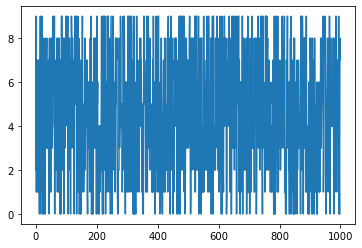

In [2]:
# Sequence of random numbers
seed(1)
series = [randrange(10) for i in range (1000)]
pyplot.plot(series)
pyplot.show()

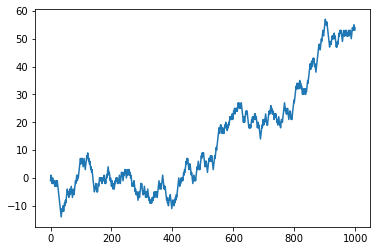

In [3]:
# Random walk
# Next value in the sequence is a modification to the previous value in the sequence
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

pyplot.plot(random_walk)
pyplot.show()

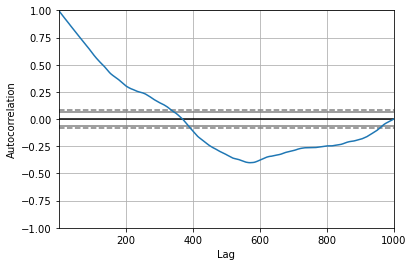

In [4]:
# Autocorrelation of a random walk
# expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.
autocorrelation_plot(random_walk)
pyplot.show()

In [6]:
# Random walk is non-stationary because all the observations in a random walk are dependent on time
# Non-stationary time series does not have a consistent mean and/or vairance over time
result = adfuller(random_walk)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Test statistic value is greater than all of the critical values at the 1%, 5% and 10% confidence levels. Therefore, time series appears to be non-stationary with a low likelihood of the result being a statistical fluke.

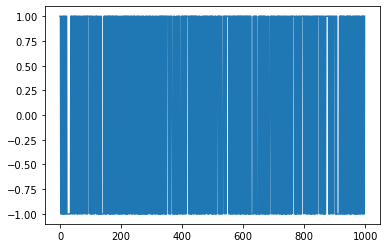

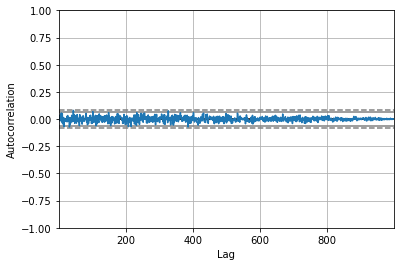

In [8]:
# Difference random walk
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)
    
pyplot.plot(diff)
pyplot.show()

# Autocorrelation plot
autocorrelation_plot(diff)
pyplot.show()

All correlations in the difference random walk are close to zero and below the 95% and 99% confidence levels.

In [10]:
# Random walk is unpredictable
# Naive forecase or a persistence model is the best prediction (using the observation at the previous step as what will happen in the next step)
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0: train_size], random_walk[train_size:]

predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


In [11]:
# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


Random prediction has worse performance than the persistence method.